In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

In [2]:
#to keep things in order, and to avoid to copy and paste everytime our functions if we want to use them in more than one folder,
#we can temporarily use this library. 
import sys

#in this way Python will search the implementations also in the path '../HelperFunctions'
sys.path.insert(0, '../HelperFunctions')


from proj1_helpers import *

In [3]:
yb, input_data, ids = load_csv_data("../Datasets/train.csv")

# Correlation matrix visualization

There are some variables that are highly (linearly) correlated! We can try to delete some of them

<b>NOTE</b>: this is simply to have an overlook on the procedure, we need to decide whether to look for the correlation before or after having cleaned the dataset

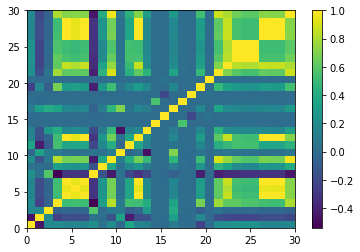

In [4]:
import pylab

# plotting the correlation matrix
R = np.corrcoef(input_data.T)
pylab.pcolor(R)
pylab.colorbar()
pylab.show()



In [5]:
#to be more precise, we can select the features according to a threshold

#choose a lowerBound and then select the couples of features that have a correlation higher than lowerbound
lowerBound = 0.8

#the upper bound 0.99 is there only to avoid to select the correlation of a variable with itself, which is one
idx_high_correlation = np.where( (lowerBound < R) & (R < 0.99))
print(idx_high_correlation)

(array([ 3,  3,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,  9,  9,  9, 12,
       12, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 24, 25,
       26, 26, 27, 27, 28, 28, 29, 29, 29, 29], dtype=int64), array([ 9, 29,  5, 22,  4,  6, 12, 22, 26, 27, 28,  5, 22,  3, 21, 29,  5,
       22,  9, 29,  4,  5,  6, 12, 23, 24, 25, 26, 27, 28, 29, 22, 22, 22,
        5, 22,  5, 22,  5, 22,  3,  9, 21, 22], dtype=int64))


In [6]:
#more convenient way to store the couples
highCorrelatedCouples = list( zip(idx_high_correlation[0], idx_high_correlation[1]) )

#the couples are duplicated, we have both (i,j) and (j,i), we keep only the first half of the list
highCorrelatedCouples = highCorrelatedCouples[0 : int(len(highCorrelatedCouples)/2) + 1]
print( highCorrelatedCouples)

[(3, 9), (3, 29), (4, 5), (4, 22), (5, 4), (5, 6), (5, 12), (5, 22), (5, 26), (5, 27), (5, 28), (6, 5), (6, 22), (9, 3), (9, 21), (9, 29), (12, 5), (12, 22), (21, 9), (21, 29), (22, 4), (22, 5), (22, 6)]
